# Data mapping

In [86]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import pysal as ps
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

## Dataset

For this tutorial, we will use the recently released Index of Multiple Deprivation from 2015.

* How to download it ([link](https://data.cdrc.ac.uk/dataset/cdrc-english-indices-of-deprivation-2015-geodata-pack-liverpool-e08000012)).
* Download background from the course website (link).

In [96]:
# This will be different on your computer and will depend on where
# you have downloaded the files
imd_shp = '../../../../data/E08000012_IMD/shapefiles/E08000012.shp'
bkg_path = 'figs/lab04_liverpool_color.tif'
data_path = '../../../../data/Liverpool/'

Load the IMD data:

In [3]:
imd = gpd.read_file(imd_shp).set_index('LSOA11CD')
imd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 298 entries, E01006512 to E01033768
Data columns (total 12 columns):
crime         298 non-null float64
education     298 non-null float64
employment    298 non-null float64
geometry      298 non-null object
health        298 non-null float64
housing       298 non-null float64
idaci         298 non-null float64
idaopi        298 non-null float64
imd_rank      298 non-null int64
imd_score     298 non-null float64
income        298 non-null float64
living_env    298 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 30.3+ KB


Additional data:

**NOTE**: this part loads up data that will be used for the rest of the tutorial but loading it involves some data transformations that are a bit more advanced that what is covered in this course. Simply run them to load the data, but you are not expected to know some of the coding tricks required in this cell.

In [98]:
# Gender breakup
gender = pd.read_csv(data_path+'tables/QS104EW_lsoa11.csv', index_col='GeographyCode')
gender = gender.rename(columns={'QS104EW0002': 'Male', 'QS104EW0003': 'Female'})[['Male', 'Female']]
maj_male = gender['Male'] > gender['Female']
gender['Gender_Majority'] = maj_male
gender.loc[gender['Gender_Majority']==True, 'Gender_Majority'] = 'Male'
gender.loc[gender['Gender_Majority']==False, 'Gender_Majority'] = 'Female'
# Status breakup
sinmar = pd.read_csv(data_path+'tables/KS103EW_lsoa11.csv', index_col='GeographyCode')
sinmar = sinmar.rename(columns={'KS103EW0002': 'Single', 'KS103EW0003': 'Married'})[['Single', 'Married']]
maj_sin = sinmar['Single'] > sinmar['Married']
sinmar['Status_Majority'] = maj_sin
sinmar.loc[sinmar['Status_Majority']==True, 'Status_Majority'] = 'Single'
sinmar.loc[sinmar['Status_Majority']==False, 'Status_Majority'] = 'Married'
# Join
both = imd.join(sinmar).join(gender)
both.crs = imd.crs

both.head()

,crime,education,employment,geometry,health,housing,idaci,idaopi,imd_rank,imd_score,income,living_env,Single,Married,Status_Majority,Male,Female,Gender_Majority
LSOA11CD,,,,,,,,,,,,,,,,,,
E01006512,-0.20,10.06,0.08,"POLYGON ((336103.358 389628.58, 336103.416 389...",1.19,24.49,0.16,0.31,10518,25.61,0.10,68.91,1288,287,Single,1070,810,Male
E01006513,1.50,20.13,0.03,"POLYGON ((335173.781 389691.538, 335169.798 38...",0.58,25.15,0.21,0.20,10339,25.91,0.04,85.48,2613,170,Single,1461,1480,Female
E01006514,0.74,15.50,0.15,"POLYGON ((335495.676 389697.267, 335495.444 38...",1.86,21.85,0.23,0.48,5247,37.64,0.19,58.90,1583,204,Single,1177,931,Male
E01006515,1.16,33.51,0.30,"POLYGON ((334953.001 389029, 334951 389035, 33...",1.90,17.40,0.46,0.76,1019,58.99,0.43,29.78,587,218,Single,595,613,Female
E01006518,0.67,49.90,0.34,"POLYGON ((335354.015 388601.947, 335354 388602...",2.24,15.52,0.50,0.52,662,63.37,0.43,31.03,716,363,Single,843,853,Female


## Unique values

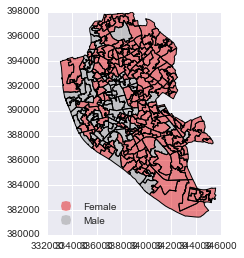

In [101]:
both.plot(column='Gender_Majority', categorical=True, legend=True)

## Equal interval

In [4]:
classi = ps.Equal_Interval(imd['imd_rank'], k=7)
classi

                 Equal Interval                
 
  Lower              Upper                Count
            x[i] <=  4604.857               156
 4604.857 < x[i] <=  9185.714                48
 9185.714 < x[i] <= 13766.571                30
13766.571 < x[i] <= 18347.429                21
18347.429 < x[i] <= 22928.286                24
22928.286 < x[i] <= 27509.143                14
27509.143 < x[i] <= 32090.000                 5

In [5]:
classi.bins

array([  4604.85714286,   9185.71428571,  13766.57142857,  18347.42857143,
        22928.28571429,  27509.14285714,  32090.        ])

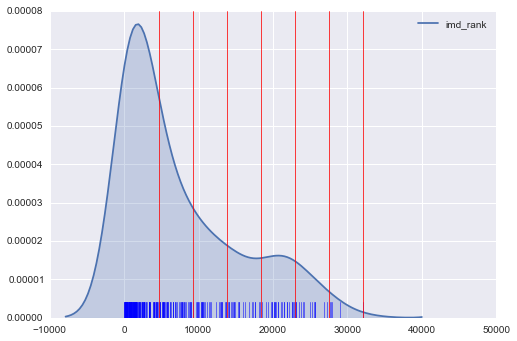

In [6]:
f, ax = plt.subplots(1)
sns.kdeplot(imd['imd_rank'], shade=True)
sns.rugplot(imd['imd_rank'], alpha=0.5)
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
plt.show()

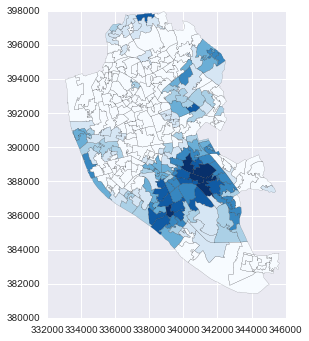

In [19]:
imd.plot(column='imd_rank', scheme='equal_interval', alpha=1, k=7, colormap=plt.cm.Blues)

## Quantiles

In [8]:
classi = ps.Quantiles(imd['imd_rank'], k=7)
classi

                  Quantiles                   
 
  Lower              Upper               Count
            x[i] <=   633.714               43
  633.714 < x[i] <=  1335.714               42
 1335.714 < x[i] <=  2641.000               43
 2641.000 < x[i] <=  5540.143               42
 5540.143 < x[i] <= 10355.857               43
10355.857 < x[i] <= 18401.143               42
18401.143 < x[i] <= 32090.000               43

In [9]:
classi.bins

array([   633.71428571,   1335.71428571,   2641.        ,   5540.14285714,
        10355.85714286,  18401.14285714,  32090.        ])

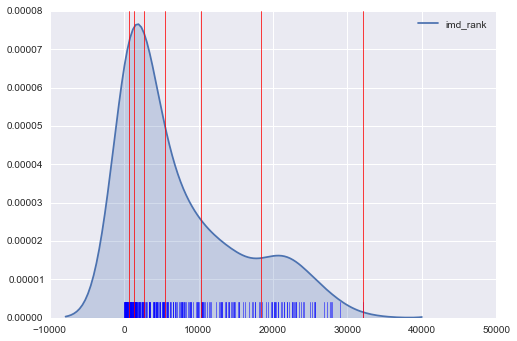

In [10]:
f, ax = plt.subplots(1)
sns.kdeplot(imd['imd_rank'], shade=True)
sns.rugplot(imd['imd_rank'], alpha=0.5)
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
plt.show()

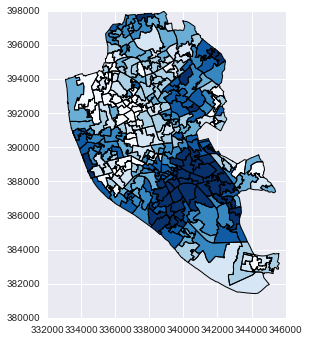

In [11]:
imd.plot(column='imd_rank', scheme='QUANTILES', alpha=1, k=7, colormap=plt.cm.Blues)

## Fisher-Jenks

In [12]:
classi = ps.Fisher_Jenks(imd['imd_rank'], k=7)
classi

                  Fisher_Jenks                 
 
  Lower              Upper                Count
            x[i] <=  2930.000               133
 2930.000 < x[i] <=  6946.000                52
 6946.000 < x[i] <= 11656.000                39
11656.000 < x[i] <= 16185.000                24
16185.000 < x[i] <= 20719.000                20
20719.000 < x[i] <= 24098.000                18
24098.000 < x[i] <= 32090.000                12

In [13]:
classi.bins

array([  2930.,   6946.,  11656.,  16185.,  20719.,  24098.,  32090.])

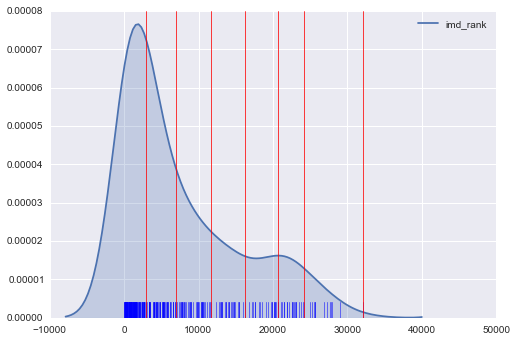

In [14]:
f, ax = plt.subplots(1)
sns.kdeplot(imd['imd_rank'], shade=True)
sns.rugplot(imd['imd_rank'], alpha=0.5)
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
plt.show()

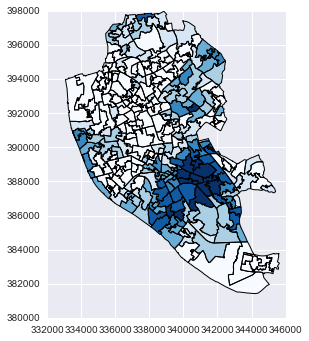

In [15]:
imd.plot(column='imd_rank', scheme='fisher_jenks', alpha=1, k=7, colormap=plt.cm.Blues)

## `[Extension 1]` Conditional maps

Check [this](http://stanford.edu/~mwaskom/software/seaborn/examples/faceted_histogram.html).

## `[Extension 2]` Base maps

In [16]:
import rasterio
liv_path = '../../../../data/liverpool.tif'
def show_img(img, bounds):
    left, bottom, right, top = bounds
    plt.imshow(img, cmap='gray', extent=(left, right, bottom, top))
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)

CPU times: user 4.11 s, sys: 1.68 s, total: 5.78 s
Wall time: 5.64 s


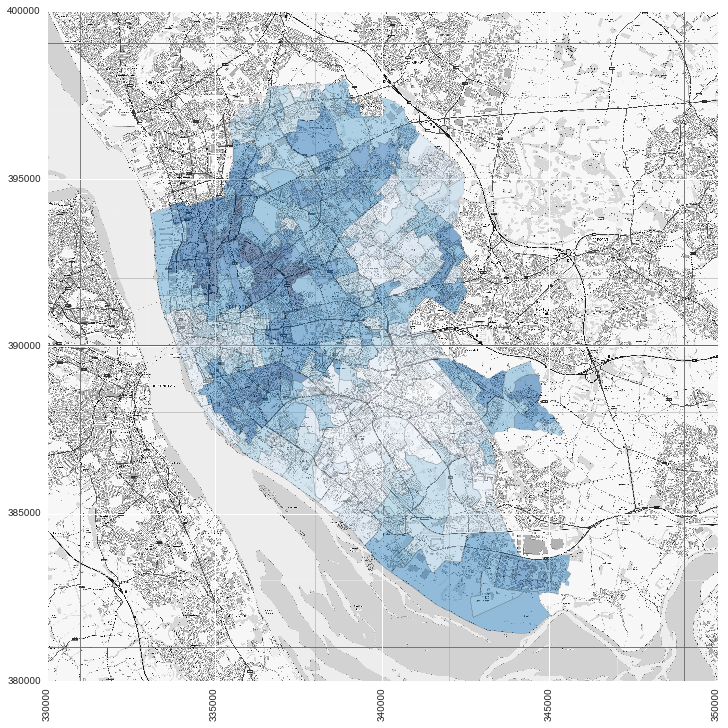

In [58]:
%%time
src = rasterio.open(liv_path)
left, bottom, right, top = src.bounds

f, ax = plt.subplots(1, figsize=(12, 12))
ax.imshow(src.read(1), cmap='gray', extent=(left, right, bottom, top))
imd.plot(column='imd_score', colormap='Blues', linewidth=0.1, axes=ax)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

## `[Extension 3]` Maps from lecture slides

* Unique values

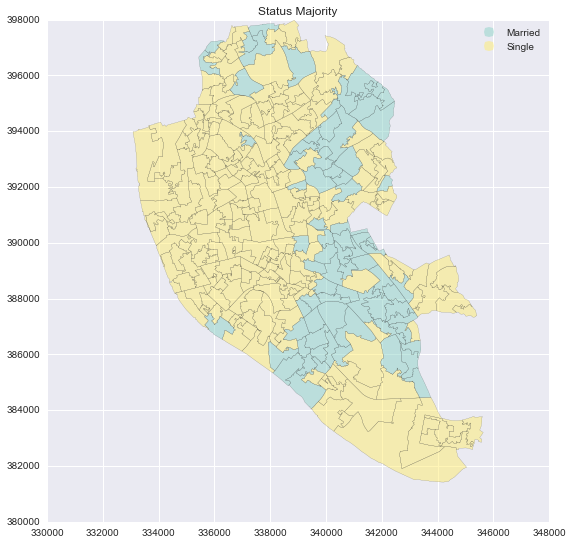

In [112]:
f, ax = plt.subplots(1, figsize=(9, 9))
both.plot(column='Status_Majority', categorical=True, legend=True, axes=ax, \
          linewidth=0.1, colormap='Set3')
ax.set_title('Status Majority')
plt.axis('equal')
plt.savefig('../lectures/figs/l04_unique_values.png')
plt.show()

* Choropleth classifiers

In [55]:
def plot_scheme(scheme, var, db, figsize=(16, 8), saveto=None):
    '''
    Plot the distribution over value and geographical space of variable `var` using scheme `scheme
    ...
    
    Arguments
    ---------
    scheme   : str
               Name of the classification scheme to use 
    var      : str
               Variable name 
    db       : GeoDataFrame
               Table with input data
    figsize  : Tuple
               [Optional. Default = (16, 8)] Size of the figure to be created.
    saveto   : None/str
               [Optional. Default = None] Path for file to save the plot.
    '''
    from pysal.esda.mapclassify import Quantiles, Equal_Interval, Fisher_Jenks
    schemes = {'equal_interval': Equal_Interval, \
               'quantiles': Quantiles, \
               'fisher_jenks': Fisher_Jenks}
    classi = schemes[scheme](db[var], k=7)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    # KDE
    sns.kdeplot(db[var], shade=True, ax=ax1)
    sns.rugplot(db[var], alpha=0.5, ax=ax1)
    for cut in classi.bins:
        ax1.axvline(cut, color='red', linewidth=0.75)
    ax1.set_title('Value distribution')
    # Map
    p = db.plot(column=var, scheme=scheme, alpha=0.75, k=7, \
             colormap=plt.cm.Blues, axes=ax2, linewidth=0.1)
    ax2.axis('equal')
    ax2.set_axis_off()
    ax2.set_title('Geographical distribution')
    f.suptitle(scheme, size=25)
    if saveto:
        plt.savefig(saveto)
    plt.show()

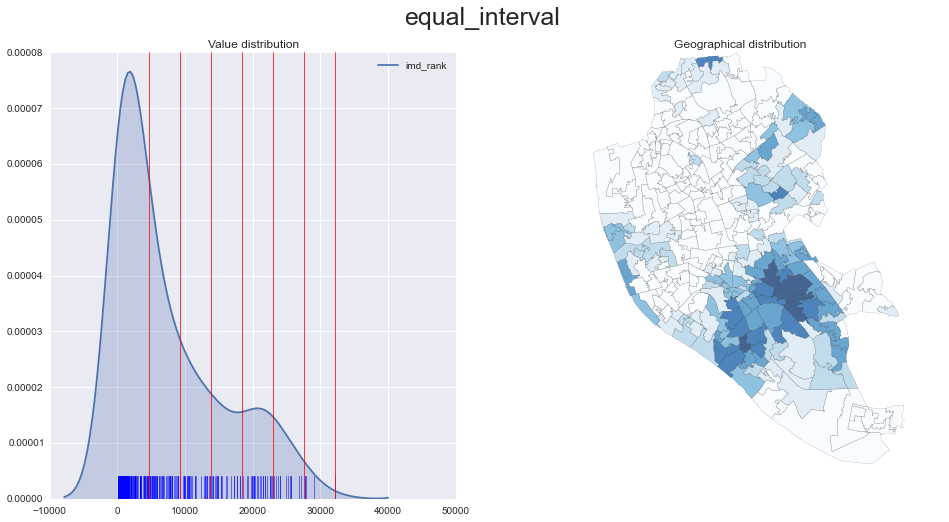

In [56]:
plot_scheme('equal_interval', 'imd_rank', imd, saveto='../lectures/figs/l04_equal_interval.png')

* Conditional map

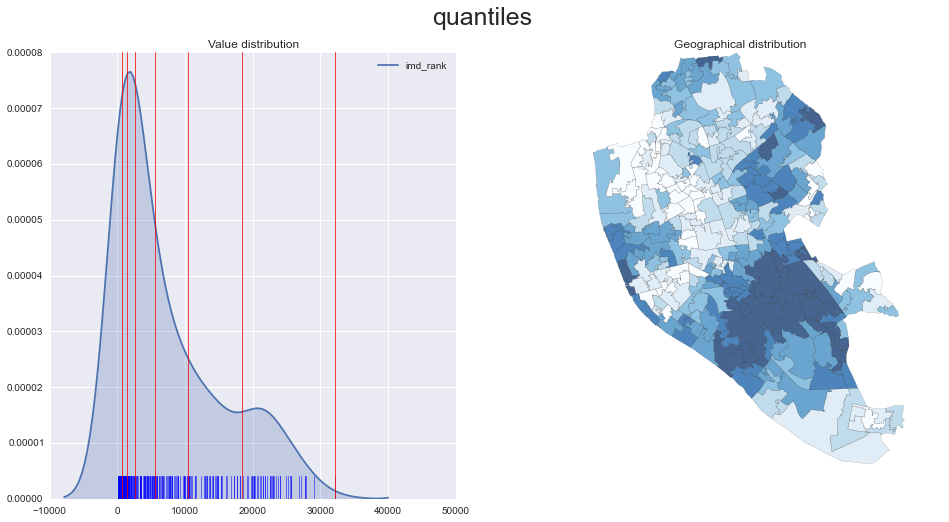

In [57]:
plot_scheme('quantiles', 'imd_rank', imd, saveto='../lectures/figs/l04_quantiles.png')